## Improving generalization

In [14]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_images, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def vectorize(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

In [5]:
train_data = vectorize(train_data)

**Adding L2 weight regularization to the model**

In [7]:
model = Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(1, activation="sigmoid")
])

In [8]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_l2_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.6102 - accuracy: 0.7859 - val_loss: 0.4854 - val_accuracy: 0.8653
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4227 - accuracy: 0.8897 - val_loss: 0.4144 - val_accuracy: 0.8744
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3535 - accuracy: 0.9063 - val_loss: 0.3927 - val_accuracy: 0.8767
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3239 - accuracy: 0.9143 - val_loss: 0.3653 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2988 - accuracy: 0.9250 - val_loss: 0.3644 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2856 - accuracy: 0.9299 - val_loss: 0.3626 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2756 - accuracy: 0.9335 - val_loss: 0.3675 - val_accuracy: 0.8835
Epoch 8/20
30

**Adding L1 weight regularizers**

In [10]:
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [11]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_l1_reg = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2471 - accuracy: 0.9385 - val_loss: 0.4003 - val_accuracy: 0.8770
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2232 - accuracy: 0.9490 - val_loss: 0.4340 - val_accuracy: 0.8690
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2140 - accuracy: 0.9543 - val_loss: 0.4875 - val_accuracy: 0.8527
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2166 - accuracy: 0.9531 - val_loss: 0.4271 - val_accuracy: 0.8707
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2101 - accuracy: 0.9581 - val_loss: 0.5089 - val_accuracy: 0.8462
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2133 - accuracy: 0.9559 - val_loss: 0.4131 - val_accuracy: 0.8773
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2112 - accuracy: 0.9553 - val_loss: 0.4164 - val_accuracy: 0.8755
Epoch 8/20
30

#### Adding dropout

In [15]:
model = Sequential([
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

In [16]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_dropout = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6059 - accuracy: 0.6780 - val_loss: 0.4735 - val_accuracy: 0.8564
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4724 - accuracy: 0.7937 - val_loss: 0.3829 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3967 - accuracy: 0.8401 - val_loss: 0.3301 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3428 - accuracy: 0.8675 - val_loss: 0.3046 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2969 - accuracy: 0.8886 - val_loss: 0.2832 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2602 - accuracy: 0.9084 - val_loss: 0.2735 - val_accuracy: 0.8939
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2341 - accuracy: 0.9179 - val_loss: 0.2782 - val_accuracy: 0.8929
Epoch 8/20
30

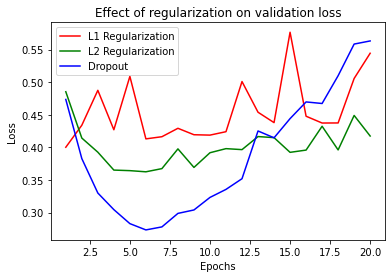

In [17]:
plt.plot(range(1, 21), history_l1_reg.history["val_loss"], "r", label="L1 Regularization")
plt.plot(range(1, 21), history_l2_reg.history["val_loss"], "g", label="L2 Regularization")
plt.plot(range(1, 21), history_dropout.history["val_loss"], "b", label="Dropout")
plt.title("Effect of regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()